In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [2]:
img = []
tar = []
for i in range(20):
    img.append(mpimg.imread(str(i)+'.jpg'))
    tar.append('=')
img = np.array(img)
tar = np.array(tar)
digits = datasets.load_digits()

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
label = digits.target.reshape((n_samples,))

In [4]:
img_gray = []
for i in range(20):
    img_gray.append((16-img[i][:,:,0]*16).astype(int))

In [5]:
for i in range(20):
    data = np.append(data,img_gray[i].reshape(1,64), axis=0)

In [6]:
label = np.append(label, tar)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.03)

In [9]:
mlp.fit(X_train, y_train)
print("Training set acore: ", mlp.score(X_train, y_train))
print("Test set score: ", mlp.score(X_test, y_test))

Iteration 1, loss = 7.88808101
Iteration 2, loss = 2.12992255
Iteration 3, loss = 1.79935464
Iteration 4, loss = 1.49366418
Iteration 5, loss = 1.33250305
Iteration 6, loss = 1.14154141
Iteration 7, loss = 0.83355818
Iteration 8, loss = 0.66422754
Iteration 9, loss = 0.58479268
Iteration 10, loss = 0.50750602
Iteration 11, loss = 0.47052339
Iteration 12, loss = 0.38136301
Iteration 13, loss = 0.34578289
Iteration 14, loss = 0.26136967
Iteration 15, loss = 0.25986934
Iteration 16, loss = 0.19306363
Iteration 17, loss = 0.16064534
Iteration 18, loss = 0.11720488
Iteration 19, loss = 0.13398590
Iteration 20, loss = 0.11790459
Iteration 21, loss = 0.09929983
Iteration 22, loss = 0.08860697
Iteration 23, loss = 0.08126132
Iteration 24, loss = 0.07409411
Iteration 25, loss = 0.07498239
Iteration 26, loss = 0.06570871
Iteration 27, loss = 0.06394531
Iteration 28, loss = 0.06482436
Iteration 29, loss = 0.05522478
Iteration 30, loss = 0.06225733
Iteration 31, loss = 0.05363475
Iteration 32, los

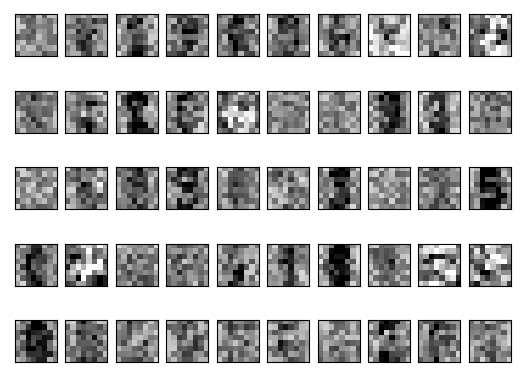

In [10]:
fig, axes = plt.subplots(5, 10)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max() 
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(()) 
    ax.set_yticks(())
    
plt. show()

In [11]:
mlp.coefs_

[array([[-3.80694532e-02,  2.37701348e-02, -2.04914373e-01, ...,
         -1.28348348e-01, -1.04795077e-01, -1.73387086e-01],
        [-2.19917948e-01, -5.96305503e-02, -8.72603634e-02, ...,
         -4.51944305e-02, -2.60374973e-01,  5.07279514e-02],
        [-7.83414830e-02, -6.85601628e-02, -4.74669226e-04, ...,
         -4.35603103e-01, -1.99381495e-01, -2.24979683e-01],
        ...,
        [-2.79243882e-01, -6.31899681e-02, -2.33533952e-01, ...,
         -4.38351555e-01,  1.44523102e-01, -3.43163835e-02],
        [-1.63202304e-01, -3.07708726e-01,  9.58243972e-02, ...,
         -2.00555621e-01, -5.03841535e-02, -5.80513799e-02],
        [-1.74491219e-01, -7.08930125e-02, -1.25817898e-01, ...,
          7.81924191e-02,  2.46485883e-04,  1.69528403e-01]]),
 array([[ 8.55659651e-02,  1.33392733e-01,  2.53330688e-01,
          1.76263793e-01,  1.11762805e-01,  2.59519859e-02,
         -1.47752723e-01,  9.50249744e-02,  1.78180014e-01,
          2.49502841e-01,  2.58215901e-01],
     

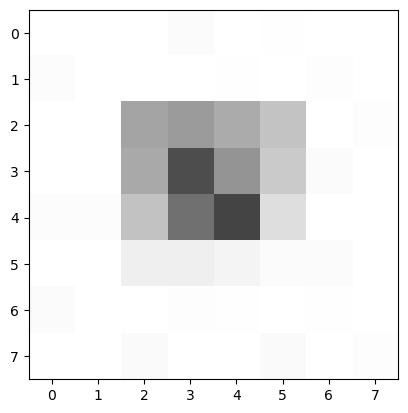

In [12]:
img = mpimg.imread('16.jpg')
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [13]:
img_gray = (16-img[:,:,0]*16).astype(int)

In [14]:
pr_my = mlp.predict(img_gray.reshape(1,64))
print('Это символ - '+str(pr_my[0]))

Это символ - =
